# Mini Assignment 9

### Import libraies

In [37]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime

# Import dataset and Data processing

In [38]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [39]:
jh_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [40]:
df['date']=pd.to_datetime(df['date'], errors='ignore')

In [41]:
jh_recovered2=jh_recovered.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name = 'date', value_name = 'recovered')


In [42]:
jh_recovered2['date']=pd.to_datetime(jh_recovered2['date'], errors='ignore')


In [43]:
jh_recovered2=jh_recovered2.drop(["Province/State","Lat","Long"], axis=1)


In [44]:
jh_recovered2_grouped=jh_recovered2.groupby(["Country/Region","date"]).sum()

In [45]:
merge1=df.merge(jh_recovered2_grouped, how='inner', left_on=["location", "date"], right_on=["Country/Region","date"])

In [46]:
merge1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,recovered
0,AFG,Asia,Afghanistan,2020-01-22,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,0
1,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,0
2,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,0
3,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,0
4,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45985,ZWE,Africa,Zimbabwe,2020-11-12,8667.0,57.0,34.286,255.0,0.0,1.000,583.129,3.835,2.307,17.157,0.000,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150616.0,1086.0,10.134,0.073,796.0,0.054,23.217,0.043,tests performed,67.59,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,8060
45986,ZWE,Africa,Zimbabwe,2020-11-13,8696.0,29.0,36.000,255.0,0.0,1.000,585.080,1.951,2.422,17.157,0.000,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151708.0,1092.0,10.207,0.073,844.0,0.057,23.444,0.043,tests performed,67.59,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,8090
45987,ZWE,Africa,Zimbabwe,2020-11-14,8765.0,69.0,42.000,257.0,2.0,1.000,589.722,4.642,2.826,17.291,0.135,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152288.0,580.0,10.246,0.039,829.0,0.056,19.738,0.051,tests performed,67.59,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,8096
45988,ZWE,Africa,Zimbabwe,2020-11-15,8786.0,21.0,41.143,257.0,0.0,0.857,591.135,1.413,2.768,17.291,0.000,0.058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153248.0,960.0,10.311,0.065,883.0,0.059,21.462,0.047,tests performed,67.59,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,8096


In [47]:
South = merge1.loc[merge1["location"] == "South Africa"]
SouthClean = South.fillna(0)
SouthClean

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,recovered
38752,ZAF,Africa,South Africa,2020-02-07,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.001,0.000,0.0,0.000,0.000,0.000,people tested,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,0
38753,ZAF,Africa,South Africa,2020-02-08,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,people tested,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,0
38754,ZAF,Africa,South Africa,2020-02-09,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,people tested,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,0
38755,ZAF,Africa,South Africa,2020-02-10,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,people tested,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,0
38756,ZAF,Africa,South Africa,2020-02-11,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0,0.001,0.000,0.0,0.000,0.000,0.000,people tested,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39031,ZAF,Africa,South Africa,2020-11-12,742394.0,2140.0,1692.286,20011.0,60.0,60.857,12517.457,36.082,28.534,337.404,1.012,1.026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5063457.0,25675.0,85.375,0.433,20833.0,0.351,12.311,0.081,people tested,38.89,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,690903
39032,ZAF,Africa,South Africa,2020-11-13,744732.0,2338.0,1759.714,20076.0,65.0,57.000,12556.878,39.421,29.670,338.500,1.096,0.961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5086887.0,23430.0,85.770,0.395,20881.0,0.352,11.866,0.084,people tested,38.89,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,692177
39033,ZAF,Africa,South Africa,2020-11-14,746945.0,2213.0,1824.286,20153.0,77.0,57.714,12594.192,37.313,30.759,339.798,1.298,0.973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5110384.0,23497.0,86.166,0.396,21030.0,0.355,11.528,0.087,people tested,38.89,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,693261
39034,ZAF,Africa,South Africa,2020-11-15,749182.0,2237.0,1896.571,20206.0,53.0,59.571,12631.909,37.718,31.978,340.692,0.894,1.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5130192.0,19808.0,86.500,0.334,21393.0,0.361,11.280,0.089,people tested,38.89,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,

# New Deaths

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730.]),
 <a list of 10 Text major ticklabel objects>)

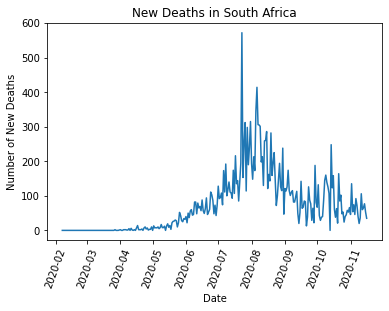

In [48]:
plt.plot(SouthClean["date"],SouthClean["new_deaths"])
plt.title("New Deaths in South Africa")
plt.xlabel("Date")
plt.ylabel("Number of New Deaths")
plt.xticks(rotation=70)

# New recovery

In [49]:
SouthClean['new_recover']=SouthClean['recovered'].diff()

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730.]),
 <a list of 10 Text major ticklabel objects>)

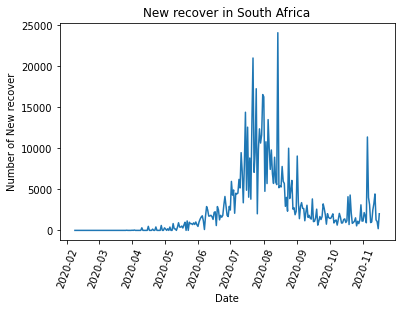

In [50]:
plt.plot(SouthClean["date"],SouthClean["new_recover"])
plt.title("New recover in South Africa")
plt.xlabel("Date")
plt.ylabel("Number of New recover")
plt.xticks(rotation=70)

# New tests

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730.]),
 <a list of 10 Text major ticklabel objects>)

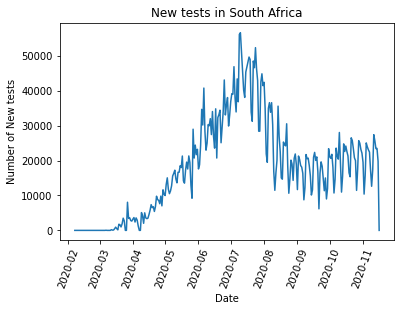

In [51]:
plt.plot(SouthClean["date"],SouthClean["new_tests"])
plt.title("New tests in South Africa")
plt.xlabel("Date")
plt.ylabel("Number of New tests")
plt.xticks(rotation=70)

# New cases

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730.]),
 <a list of 10 Text major ticklabel objects>)

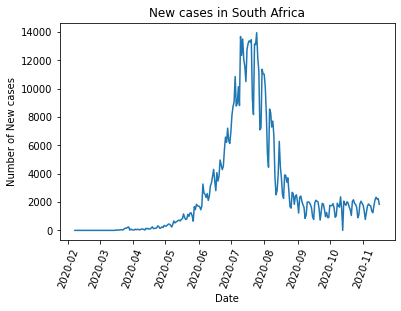

In [52]:
plt.plot(SouthClean["date"],SouthClean["new_cases"])
plt.title("New cases in South Africa")
plt.xlabel("Date")
plt.ylabel("Number of New cases")
plt.xticks(rotation=70)

##It can be clearly seen from the above four plots that the COVID-19 in South Africa started in March and was in an outbreak period from June to July, and it was under control in August.

# CFR
CFR= (number of deaths of disease)/(number of deaths from disease +number of recovered from disease)

(array([737516., 737546., 737577., 737607., 737638., 737669., 737699.,
        737730.]), <a list of 8 Text major ticklabel objects>)

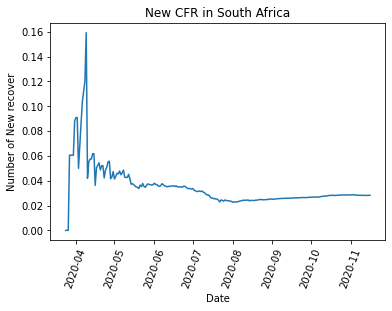

In [53]:
Each_day_CFR = SouthClean["total_deaths"]/(SouthClean["total_deaths"]+SouthClean['recovered'])
Each_day_CFR
plt.plot(SouthClean["date"],Each_day_CFR)
plt.title("New CFR in South Africa")
plt.xlabel("Date")
plt.ylabel("Number of New recover")
plt.xticks(rotation=70)

##It can be clearly seen that at the beginning of the epidemic, people did not have enough experience to face covid-19, so the death rate was very high,and the death rate was control from August.

#When calculating CFR, only people who have been tested are counted. In fact, there are many people who have been infected with covid-19 but have not yet been tested. So we need to calculate IFR

# IFR 

In [54]:
A = pd.read_csv('https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Checkpoint%202/Model%20Datasets/daily-new-estimated-covid-19-infections-icl-model.csv?token=AAABDAXBIEHOM7GMMMZQOGK7XT3OW')
A_ = A.loc[A["Entity"] == "South Africa"]
A_clean = A_.fillna(0)
A_clean['Date']=pd.to_datetime(A_clean['Date'], errors='ignore')
A_clean

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (ICL, mean)","Daily new estimated infections of COVID-19 (ICL, lower)","Daily new estimated infections of COVID-19 (ICL, upper)"
50642,South Africa,ZAF,2020-02-16,0.00000,0,0.00,0.0,0.0
50643,South Africa,ZAF,2020-02-17,0.00000,0,0.35,0.0,2.0
50644,South Africa,ZAF,2020-02-18,0.00000,0,0.66,0.0,2.0
50645,South Africa,ZAF,2020-02-19,0.00000,0,0.82,0.0,3.0
50646,South Africa,ZAF,2020-02-20,0.00000,0,0.81,0.0,3.0
...,...,...,...,...,...,...,...,...
50907,South Africa,ZAF,2020-11-07,1499.00000,0,0.00,0.0,0.0
50908,South Africa,ZAF,2020-11-08,1493.42857,0,0.00,0.0,0.0
50909,South Africa,ZAF,2020-11-09,1493.57143,0,0.00,0.0,0.0
50910,South Africa,ZAF,2020-11-10,1561.42857,0,0.00,0.0,0.0


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730.]),
 <a list of 10 Text major ticklabel objects>)

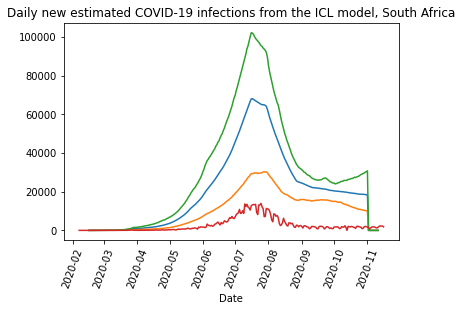

In [55]:
plt.plot(A_clean["Date"],A_clean["Daily new estimated infections of COVID-19 (ICL, mean)"])
plt.plot(A_clean["Date"],A_clean["Daily new estimated infections of COVID-19 (ICL, lower)"])
plt.plot(A_clean["Date"],A_clean["Daily new estimated infections of COVID-19 (ICL, upper)"])
plt.plot(SouthClean["date"],SouthClean["new_cases"])
plt.title("Daily new estimated COVID-19 infections from the ICL model, South Africa")
plt.xlabel("Date")
plt.xticks(rotation=70)

# IFR which is just the total deaths/total infected people
#a number of people infected=number of confirmed cases (known) +number of unknown cases (unknown)

In [56]:
Total_death = max(SouthClean["total_deaths"])
total_infected_mean = sum(A_clean["Daily new estimated infections of COVID-19 (ICL, mean)"])
total_infected_lower = sum(A_clean["Daily new estimated infections of COVID-19 (ICL, lower)"])
total_infected_upper = sum(A_clean["Daily new estimated infections of COVID-19 (ICL, upper)"])

In [57]:
IFR_mean = (Total_death/total_infected_mean)*100
IFR_lower = (Total_death/total_infected_lower)*100
IFR_upper = (Total_death/total_infected_upper)*100
IFR_mean

0.35945868303384937

In [58]:
un = (IFR_lower+IFR_upper)/2

In [59]:
from IPython.display import Markdown as md
md("The IFR is {}±{} .".format(round(IFR_mean,2),round(un,2)))

The IFR is 0.36±0.48 .